In [1]:
vcf_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/somatic_variants/regions_atac_peaks/gatk_mutect/variants.vcf"
out_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/somatic_variants/regions_atac_peaks/gatk_mutect/post/hetfilt/minaf05_midaf45_ad10_dp500_qual25/variants.vcf"

qual = 25
min_aaf = 0.05
mid_aaf = 0.45
min_ad = 10
min_dp = 500

n_donors = 2

In [2]:
mid_het = 0.5/n_donors


In [3]:
# For each param p get 1-p in a case a clone mutated in a donor germline variant 
max_aaf = 1-min_aaf
top_mid_aaf = 1 - mid_aaf
up_mid_het = 1 - mid_het #reverts from alt to ref somatic mutation

In [4]:
import sys
from os.path import exists
import os
import cyvcf2
n = 0
from src.utils.data_io import read_csv_multichar, write_header_df

%load_ext autoreload
%autoreload 2


fig_utils from mplh


In [5]:
vcf, head = read_csv_multichar(vcf_f, multicomment="##", encoding='utf-8', verbose=True,
                       return_head=True,sep="\t")

ic| f'skipping {curr} rows': 'skipping 239 rows'


In [6]:
def filt_af(af, min_aaf, mid_aaf, mid_het, aaf_rm, mid_rm):
    if not (af > min_aaf and af < mid_aaf): 
        aaf_rm.append(v)
        return False
    if not (af < mid_het-0.02 or af > mid_het+0.02):
        mid_rm.append(v)
        return False
    return True
    

In [7]:
vars_to_keep = {}
aaf_rm = []
aad_rm = []
depth_rm = []
qual_rm = []
snp_rm = []
all_aaf = []


af_all = []
ad_all = []
depth_all = []

af_kp = []
ad_kp = []
depth_kp = []
mid_rm = []

for count, v in enumerate(cyvcf2.VCF(vcf_f)):
    depth = sum(v.gt_depths)
    ad = sum(v.gt_alt_depths)
    af = ad/depth 
    
    inv_af = 1 - af
    af_all.append(af)
    ad_all.append(ad)
    depth_all.append(depth)
    all_aaf.append(v.aaf)
    if v.var_type != 'snp': 
        snp_rm.append(v)
        continue # SNPs
    if v.QUAL is not None:
        if v.QUAL < qual: 
            qual_rm.append(v)
            continue            
#     if not (af > min_aaf and af < mid_aaf): 
#         aaf_rm.append(v)
#         continue
#     if not (af < mid_het-0.02 or af > mid_het+0.02):
#         mid_rm.append(v)
#         continue      
    if not (ad > min_ad):
        aad_rm.append(v)
        continue
    if not (depth>min_dp):
        depth_rm.append(v)
        continue
    

    af_pass = filt_af(af, min_aaf, mid_aaf, mid_het, aaf_rm, mid_rm)
    if not af_pass:
        inv_af_pass = filt_af(inv_af, min_aaf, mid_aaf, mid_het, aaf_rm, mid_rm)
        if not inv_af_pass:
            continue
    
    vars_to_keep[count]=v
    af_kp.append(af)
    ad_kp.append(ad)
    depth_kp.append(depth)
    n += 1
    if n%1000 == 0:
        print(n)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

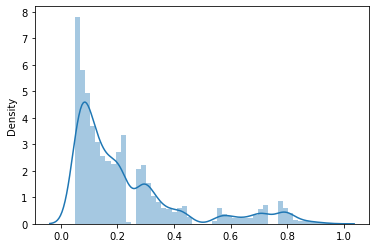

In [8]:
import seaborn as sns
sns.distplot(af_kp)

In [9]:
len(af_kp)

13649

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

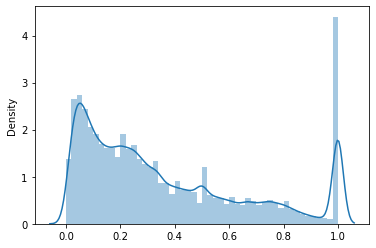

In [10]:
sns.distplot(af_all)

<AxesSubplot:>

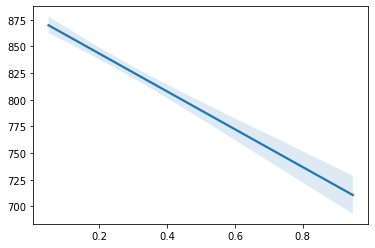

In [11]:
sns.regplot(x=af_kp,y=depth_kp, scatter=False)

In [12]:
vars_to_keep

{48: Variant(chr1:827583 A/T),
 376: Variant(chr1:1305755 C/T),
 686: Variant(chr1:1724489 G/C),
 699: Variant(chr1:1746440 A/G),
 1011: Variant(chr1:2234759 C/T),
 1025: Variant(chr1:2255646 T/G),
 1039: Variant(chr1:2290637 G/A),
 1057: Variant(chr1:2301087 G/T),
 1058: Variant(chr1:2301093 G/A),
 1164: Variant(chr1:2526578 A/G),
 1298: Variant(chr1:2556224 C/A),
 1915: Variant(chr1:3650142 G/A),
 2049: Variant(chr1:3857251 C/G),
 2091: Variant(chr1:3901407 C/T),
 2239: Variant(chr1:5992521 G/A),
 2272: Variant(chr1:6028197 G/T),
 2490: Variant(chr1:6235889 G/A),
 2905: Variant(chr1:6613610 G/T),
 2906: Variant(chr1:6613720 C/G),
 2937: Variant(chr1:6701842 C/T),
 2938: Variant(chr1:6701850 G/T),
 2939: Variant(chr1:6701853 A/G),
 2940: Variant(chr1:6701855 T/C),
 2942: Variant(chr1:6701860 C/T),
 3022: Variant(chr1:6785000 G/C),
 3023: Variant(chr1:6785028 C/G),
 3025: Variant(chr1:6785052 C/T),
 3026: Variant(chr1:6785093 C/T),
 3028: Variant(chr1:6785126 G/A),
 3029: Variant(chr1:

In [13]:
len(vars_to_keep)

13649

## Save vars_to_keep as vcf file

In [14]:
filt_vcf = vcf.iloc[list(vars_to_keep.keys())]
print(filt_vcf.shape)
filt_vcf.head()

(13649, 12)


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,Control,Flt3l,Input
48,chr1,827583,.,A,T,.,.,"AS_SB_TABLE=305,195|2,36;DP=562;ECNT=2;MBQ=37,...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/1:144,11:0.020:155:66,0:42,0:123,6:89,55,1,10","0/1:127,6:0.010:133:50,0:40,0:107,3:81,46,1,5","0/1:229,21:0.021:250:70,0:79,0:189,7:135,94,0,21"
376,chr1,1305755,.,C,T,.,.,"AS_SB_TABLE=224,276|60,33;DP=616;ECNT=10;MBQ=2...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/1:86,0:0.016:86:23,0:25,0:58,0:32,54,0,0","0/1:90,0:0.015:90:25,0:31,0:64,0:39,51,0,0","0/1:324,93:0.290:417:91,49:91,38:224,92:153,17..."
686,chr1,1724489,.,G,C,.,.,"AS_SB_TABLE=328,262|162,124;DP=932;ECNT=1;MBQ=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/1:193,94:0.326:287:75,34:85,43:169,82:114,79...","0/1:207,81:0.287:288:91,25:69,36:168,67:114,93...","0/1:190,111:0.368:301:68,50:75,35:155,90:100,9..."
699,chr1,1746440,.,A,G,.,.,"AS_SB_TABLE=264,139|322,171;DP=937;ECNT=3;MBQ=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/1:165,193:0.519:358:53,60:64,42:131,152:110,...","0/1:142,173:0.520:315:59,47:44,51:119,138:94,4...","0/1:96,127:0.548:223:31,27:33,40:76,99:60,36,8..."
1011,chr1,2234759,.,C,T,.,.,"AS_SB_TABLE=202,282|21,12;DP=534;ECNT=10;MBQ=3...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/1:165,0:6.255e-03:165:42,0:44,0:145,0:62,103...","0/1:144,0:7.332e-03:144:40,0:48,0:123,0:64,80,0,0","0/1:175,33:0.174:208:57,7:49,24:156,33:76,99,2..."


In [15]:
if exists(out_f):
    os.rm(out_f)
write_header_df(filt_vcf, out_f=out_f, header=head,sep="\t",index=False)

AttributeError: module 'os' has no attribute 'rm'

In [ ]:
out_f

In [ ]:
head